In [63]:
from sklearn import svm, datasets

import sklearn.model_selection as model_selection

from sklearn.metrics import accuracy_score

from sklearn.metrics import f1_score

In [64]:
iris = datasets.load_iris()

In [65]:
X = iris.data[:, :2]

y = iris.target

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=101)

In [66]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)

poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)

In [67]:
poly_pred = poly.predict(X_test)

rbf_pred = rbf.predict(X_test)

In [68]:
poly_accuracy = accuracy_score(y_test, poly_pred)

poly_f1 = f1_score(y_test, poly_pred, average='weighted')

print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))

print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  70.00
F1 (Polynomial Kernel):  69.67


In [69]:
rbf_accuracy = accuracy_score(y_test, rbf_pred)

rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')

print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))

print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  76.67
F1 (RBF Kernel):  76.36


INTRODUCTION

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine. Consider the below diagram in which there are two different categories that are classified using a decision boundary hyperplane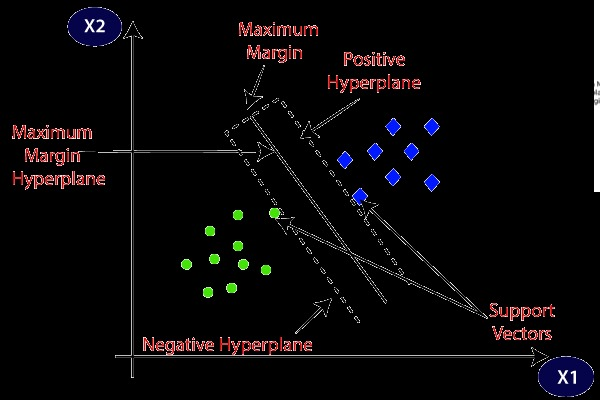

Types of SVM SVM can be of two types:

Linear SVM: Linear SVM is used for linearly separable data, which means if a dataset can be classified into two classes by using a single straight line, then such data is termed as linearly separable data, and classifier is used called as Linear SVM classifier.

Non-linear SVM: Non-Linear SVM is used for non-linearly separated data, which means if a dataset cannot be classified by using a straight line, then such data is termed as non-linear data and classifier used is called as Non-linear SVM classifier.

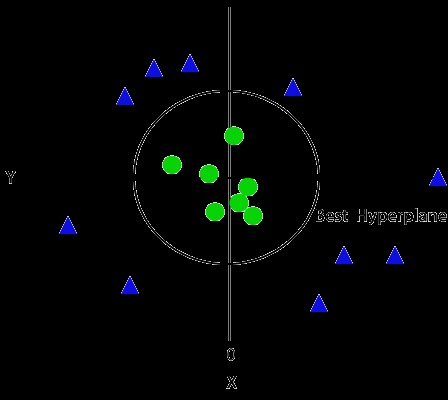

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [71]:
df=pd.read_csv('bank.csv')

In [72]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


In [73]:
X=df.drop('deposit',axis=1)
Y=df['deposit']

In [74]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

LINEAR SVM

In [75]:
from sklearn.svm import LinearSVC

Linear SVC means data should be linearly separable and support vectors will be created as per this algorithm

In [76]:
linsvc=LinearSVC()

In [77]:
linsvc.fit(X_train,Y_train)

LinearSVC()

In [78]:
Y_pred=linsvc.predict(X_train)

In [79]:
Y_predtest=linsvc.predict(X_test)

In [80]:
print(classification_report(Y_test,Y_predtest))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1760
           1       0.79      0.77      0.78      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349



NON LINEAR SVC

In [81]:
#Polynomial

from sklearn.svm import SVC

In [82]:
svc=SVC(random_state=1, kernel='poly')

In [83]:
svc.fit(X_train,Y_train)

SVC(kernel='poly', random_state=1)

In [84]:
Y_pred1=svc.predict(X_train)

In [85]:
Y_predtest1=svc.predict(X_test)

In [86]:
print(classification_report(Y_test,Y_predtest1))

              precision    recall  f1-score   support

           0       0.56      0.98      0.71      1760
           1       0.86      0.16      0.27      1589

    accuracy                           0.59      3349
   macro avg       0.71      0.57      0.49      3349
weighted avg       0.70      0.59      0.50      3349



In [87]:
#RBF Radial Bias Function

svcr=SVC(random_state=1,kernel='rbf')

In [88]:
svcr.fit(X_train,Y_train)

SVC(random_state=1)

In [89]:
Y_pred2=svcr.predict(X_train)

In [90]:
Y_predtest2=svcr.predict(X_test)

In [91]:
print(classification_report(Y_test,Y_predtest2))

              precision    recall  f1-score   support

           0       0.72      0.84      0.77      1760
           1       0.78      0.63      0.70      1589

    accuracy                           0.74      3349
   macro avg       0.75      0.74      0.74      3349
weighted avg       0.75      0.74      0.74      3349

